Notes (hidden cell)

- 09/07/24 v1
    - Quick go at density matrices using old code (as per Alignment notebooks). Working, but quite ugly (convert XR > numpy and then push through loops).
    - Ditto for full spatial distributions.
    - Should redo with ePSproc functionality for calcs AND plotting.
    

(page:denMat)=
# Excited state density matrices

From the simulated electronic wavepacket, we can analyse the properties in density matrix and real-space representations.

---

From prior work and data:

- Forbes, R. et al. (2018) ‘Quantum-beat photoelectron-imaging spectroscopy of Xe in the VUV’, Physical Review A, 97(6), p. 063417. Available at: https://doi.org/10.1103/PhysRevA.97.063417. arXiv: http://arxiv.org/abs/1803.01081, Authorea (original HTML version): https://doi.org/10.22541/au.156045380.07795038
- Data (OSF): https://osf.io/ds8mk/
- [Quantum Metrology with Photoelectrons (Github repo)](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons), particularly the [Alignment 3 notebook](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons/blob/master/Alignment/Alignment-3.ipynb). Functions from this notebook have been incorporated in the current project, under `qbanalysis.hyperfine`.

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Load packages
# Main functions used herein from qbanalysis.hyperfine
from qbanalysis.hyperfine import *
import numpy as np
from epsproc.sphCalc import setBLMs

from pathlib import Path

dataPath = Path('/tmp/xe_analysis')
# dataTypes = ['BLMall', 'BLMerr', 'BLMerrCycle']   # Read these types, should just do dir scan here.

# # Read from HDF5/NetCDF files
# # TO FIX: this should be identical to loadFinalDataset(dataPath), but gives slightly different plots - possibly complex/real/abs confusion?
# dataDict = {}
# for item in dataTypes:
#     dataDict[item] = IO.readXarray(fileName=f'Xe_dataset_{item}.nc', filePath=dataPath.as_posix()).real
#     dataDict[item].name = item

# Read from raw data files
from qbanalysis.dataset import loadFinalDataset
dataDict = loadFinalDataset(dataPath)

# Use Pandas and load Xe local data (ODS)
# These values were detemermined from the experimental data as detailed in ref. [4].
# from qbanalysis.dataset import loadXeProps
# xeProps = loadXeProps()

# Load adv. fit data
from qbanalysis.dataset import loadAdvFit

xePropsFit, xeParamsFit, paramsUDict = loadAdvFit()



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2024-07-09 14:04:11.009 | INFO     | qbanalysis.config:<module>:11 - PROJ_ROOT path is: /home/jovyan/code-share/github-share/Quantum-Beat_Photoelectron-Imaging_Spectroscopy_of_Xe_in_the_VUV
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 


* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.


* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
2024-07-09 14:04:17.956 | INFO     | qbanalysis.hyperfine:<module>:28 - Using uncertainties modules, Sympy maths functions will be forced to float outputs.
2024-07-09 14:04:18.070 | INFO     | qbanalysis.dataset:loadDataset:267 - Loaded data cpBasex_results_cycleSummed_rot90_quad1_ROI_results_with_FT_NFFT1024_hanningWindow_270717.mat.
2024-07-09 14:04:18.121 | INFO     | qbanalysis.dataset:loadDataset:267 - Loaded data cpBasex_results_allCycles_ROIs_with_FTs_NFFT1024_hanningWindow_270717.mat.
2024-07-09 14:04:18.461 | INFO     | qbanalysis.dataset:loadFinalDataset:243 - Processed data to Xarray OK.
2024-07-09 14:04:18.521 | INFO     | qbanalysis.dataset:loadAdvFit:122 - Loaded Xe adv. fit data from /home/jovyan/code-share/github-share/Quantum-Beat_Photoelectron-Imaging_Spectroscopy_of_Xe_in_the_VUV/dataLocal/xeAdvFit_09-07-24_13-32-02.h5.


In [6]:
# v2 pkg
from qbanalysis.adv_fitting import * 

2024-07-09 14:06:10.597 | INFO     | qbanalysis.basic_fitting:<module>:21 - Using uncertainties modules, Sympy maths functions will be forced to float outputs.
2024-07-09 14:06:10.597 | INFO     | qbanalysis.adv_fitting:<module>:29 - Using uncertainties modules, Sympy maths functions will be forced to float outputs.


In [7]:
# # Hide future warnings from Xarray concat for fitting on some platforms
# import warnings
# # warnings.filterwarnings('ignore')  # ALL WARNINGS
# # warnings.filterwarnings('ignore', category=DeprecationWarning)
# warnings.filterwarnings('ignore', category=FutureWarning)

## Rerun model from loaded parameters

Generate data and verify.

In [8]:
# Recalc model with uncertainties & plot...
# NOTE: currently doesn't include uncertainties on t-coord.
# TODO: add labels and fix ledgend in layout
from qbanalysis.plots import plotFinalDatasetBLMt
plotOpts = {'width':800}
calcDict = calcAdvFitModel(paramsUDict, xePropsFit=xePropsFit, dataDict=dataDict)
# plotHyperfineModel(calcDict['ionization'],overlay=['ROI']).layout('l')

# To fix layout issues, treat l separately...
l2 = (plotFinalDatasetBLMt(**dataDict) * plotHyperfineModel(calcDict['ionization'],overlay=['ROI'])).select(l=2)
l4 = (plotFinalDatasetBLMt(**dataDict) * plotHyperfineModel(calcDict['ionization'],overlay=['ROI'])).select(l=4)

(l2.overlay('l').opts(title="l2", **plotOpts) + l4.overlay('l').opts(title="l4", **plotOpts)).cols(1)

:Layout
   .HoloMap.I  :HoloMap   [Q]
      :NdOverlay   [l]
         :Overlay
            .NdOverlay.I   :NdOverlay   [ROI]
               :Spread   [t]   (BLM per cycle,BLM per cycle_std)
            .NdOverlay.II  :NdOverlay   [ROI]
               :Curve   [t]   (BLM input 0)
            .NdOverlay.III :NdOverlay   [ROI]
               :Spread   [t]   (Ionization test,Ionization test_std)
            .NdOverlay.IV  :NdOverlay   [ROI]
               :Curve   [t]   (Ionization test,Ionization test_std)
   .HoloMap.II :HoloMap   [Q]
      :NdOverlay   [l]
         :Overlay
            .NdOverlay.I   :NdOverlay   [ROI]
               :Spread   [t]   (BLM per cycle,BLM per cycle_std)
            .NdOverlay.II  :NdOverlay   [ROI]
               :Curve   [t]   (BLM input 0)
            .NdOverlay.III :NdOverlay   [ROI]
               :Spread   [t]   (Ionization test,Ionization test_std)
            .NdOverlay.IV  :NdOverlay   [ROI]
               :Curve   [t]   (Ionization test,Ionization test_std)

In [70]:
# calcDict['modelDict']['129Xe']  #.keys()

## Density matrix representations

- Use old-code for basic outputs.
- See updated ePSproc/PEMtk density matrix codes for updated plots.

In [85]:
calcDict['modelDict']['129Xe'].t   #attrs['states'] #.TKQ[0].data.item()[0]

<xarray.DataArray 't' (t: 97)>
array([-70., -60., -50., -40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.,
        50.,  60.,  70.,  80.,  90., 100., 110., 120., 130., 140., 150., 160.,
       170., 180., 190., 200., 210., 220., 230., 240., 250., 260., 270., 280.,
       290., 300., 310., 320., 330., 340., 350., 360., 370., 380., 390., 400.,
       410., 420., 430., 440., 450., 460., 470., 480., 490., 500., 510., 520.,
       530., 540., 550., 560., 570., 580., 590., 600., 610., 620., 630., 640.,
       650., 660., 670., 680., 690., 700., 710., 720., 730., 740., 750., 760.,
       770., 780., 790., 800., 810., 820., 830., 840., 850., 860., 870., 880.,
       890.])
Coordinates:
  * t        (t) float64 -70.0 -60.0 -50.0 -40.0 ... 860.0 870.0 880.0 890.0
Attributes:
    units:    ps

In [48]:
def pJpNpJNXR(Jp,J,TKQXR):
    """
    Compute pJpNpJN(Jp,J,TKQ)
    
    \begin{equation}
    \langle J'N'|\hat{\rho}|JN\rangle=\sum_{N'N}(-1)^{J'-N'}(2K+1)^{1/2}\left(\begin{array}{ccc}
    J' & J & K\\
    N' & -N & -Q
    \end{array}\right)\left\langle T(J',J)_{KQ}^{\dagger}\right\rangle 
    \end{equation}
    
    # Define density matrix p(Jp,Np,J,N) from TKQ - general version, eqn. 4.34 in Blum (p125)
    # Uses TKQ tensor values (list)
    
    """
    # Set data for legacy code
    KQ = TKQXR.TKQ
    TKQ = TKQXR.data
    
    if unFlag:
        TKQ = unumpy.nominal_values(TKQ)
    
    Jmax = max(J,Jp)
    Pmm = np.zeros((2*Jmax+1,2*Jmax+1))
    
    for Mp in range(-Jp,Jp+1):
        for M in range(-J,J+1):
            for row in range(KQ.shape[0]):
                K = KQ[row].data.item()[0]
                Q = KQ[row].data.item()[1]
                Pmm[Mp+Jp][M+J] += (-1)**(Jp-Mp)*sqrt(2*K+1)*wigner_3j(Jp,J,K,Mp,-M,-Q)*TKQ[row]
                
    return Pmm

In [78]:
# Basic case - plot single t-point, per Alignment-1 notebook.

# Set data
TKQ = calcDict['modelDict']['129Xe'][10]

# Set case
# Jp = 2  # Set angular momenta - assume a singe J-state, hence Jp=J
# J = Jp
isoKey = '129Xe'
JFlist = calcDict['modelDict'][isoKey].attrs['states']['JFlist']
Jf = np.int(JFlist[0][0]) # Final state J

pmm = pJpNpJNXR(Jf,Jf,TKQ)  # Determine pmm
pmm

/tmp/ipykernel_104067/3552366574.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Jf = np.int(JFlist[0][0]) # Final state J


array([[0.07957994, 0.        , 0.        ],
       [0.        , 0.17417345, 0.        ],
       [0.        , 0.        , 0.07957994]])

Original ensemble
Trace(pmm) = 0.333333


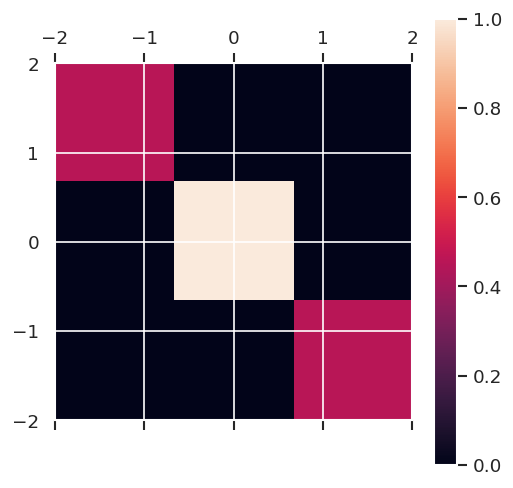

In [79]:
print('Original ensemble')
print('Trace(pmm) = {:f}'.format(np.trace(pmm)))
# print(TKQ)
plt.matshow(pmm/np.amax(pmm), extent = (-Jp,Jp,-J,J), aspect = 'equal') 
plt.colorbar()
plt.show()

In [62]:
calcDict.keys()

dict_keys(['xData', 'xePropsFit', 'dataDict', 'trange', 'fitFlag', 'returnType', 'modelDict', 'modelDictSum', 'modelDA', 'modelSum', 'dataIn', 'modelIn', 'res', 'iso', 'dataCol', 'decay', 'ionization'])

Quick plots of $\rho(t)$

Note period ~110ps for 129Xe, ~600ps for 131Xe.

p(Jf;t) for (Ji,Jf) = (0,1)


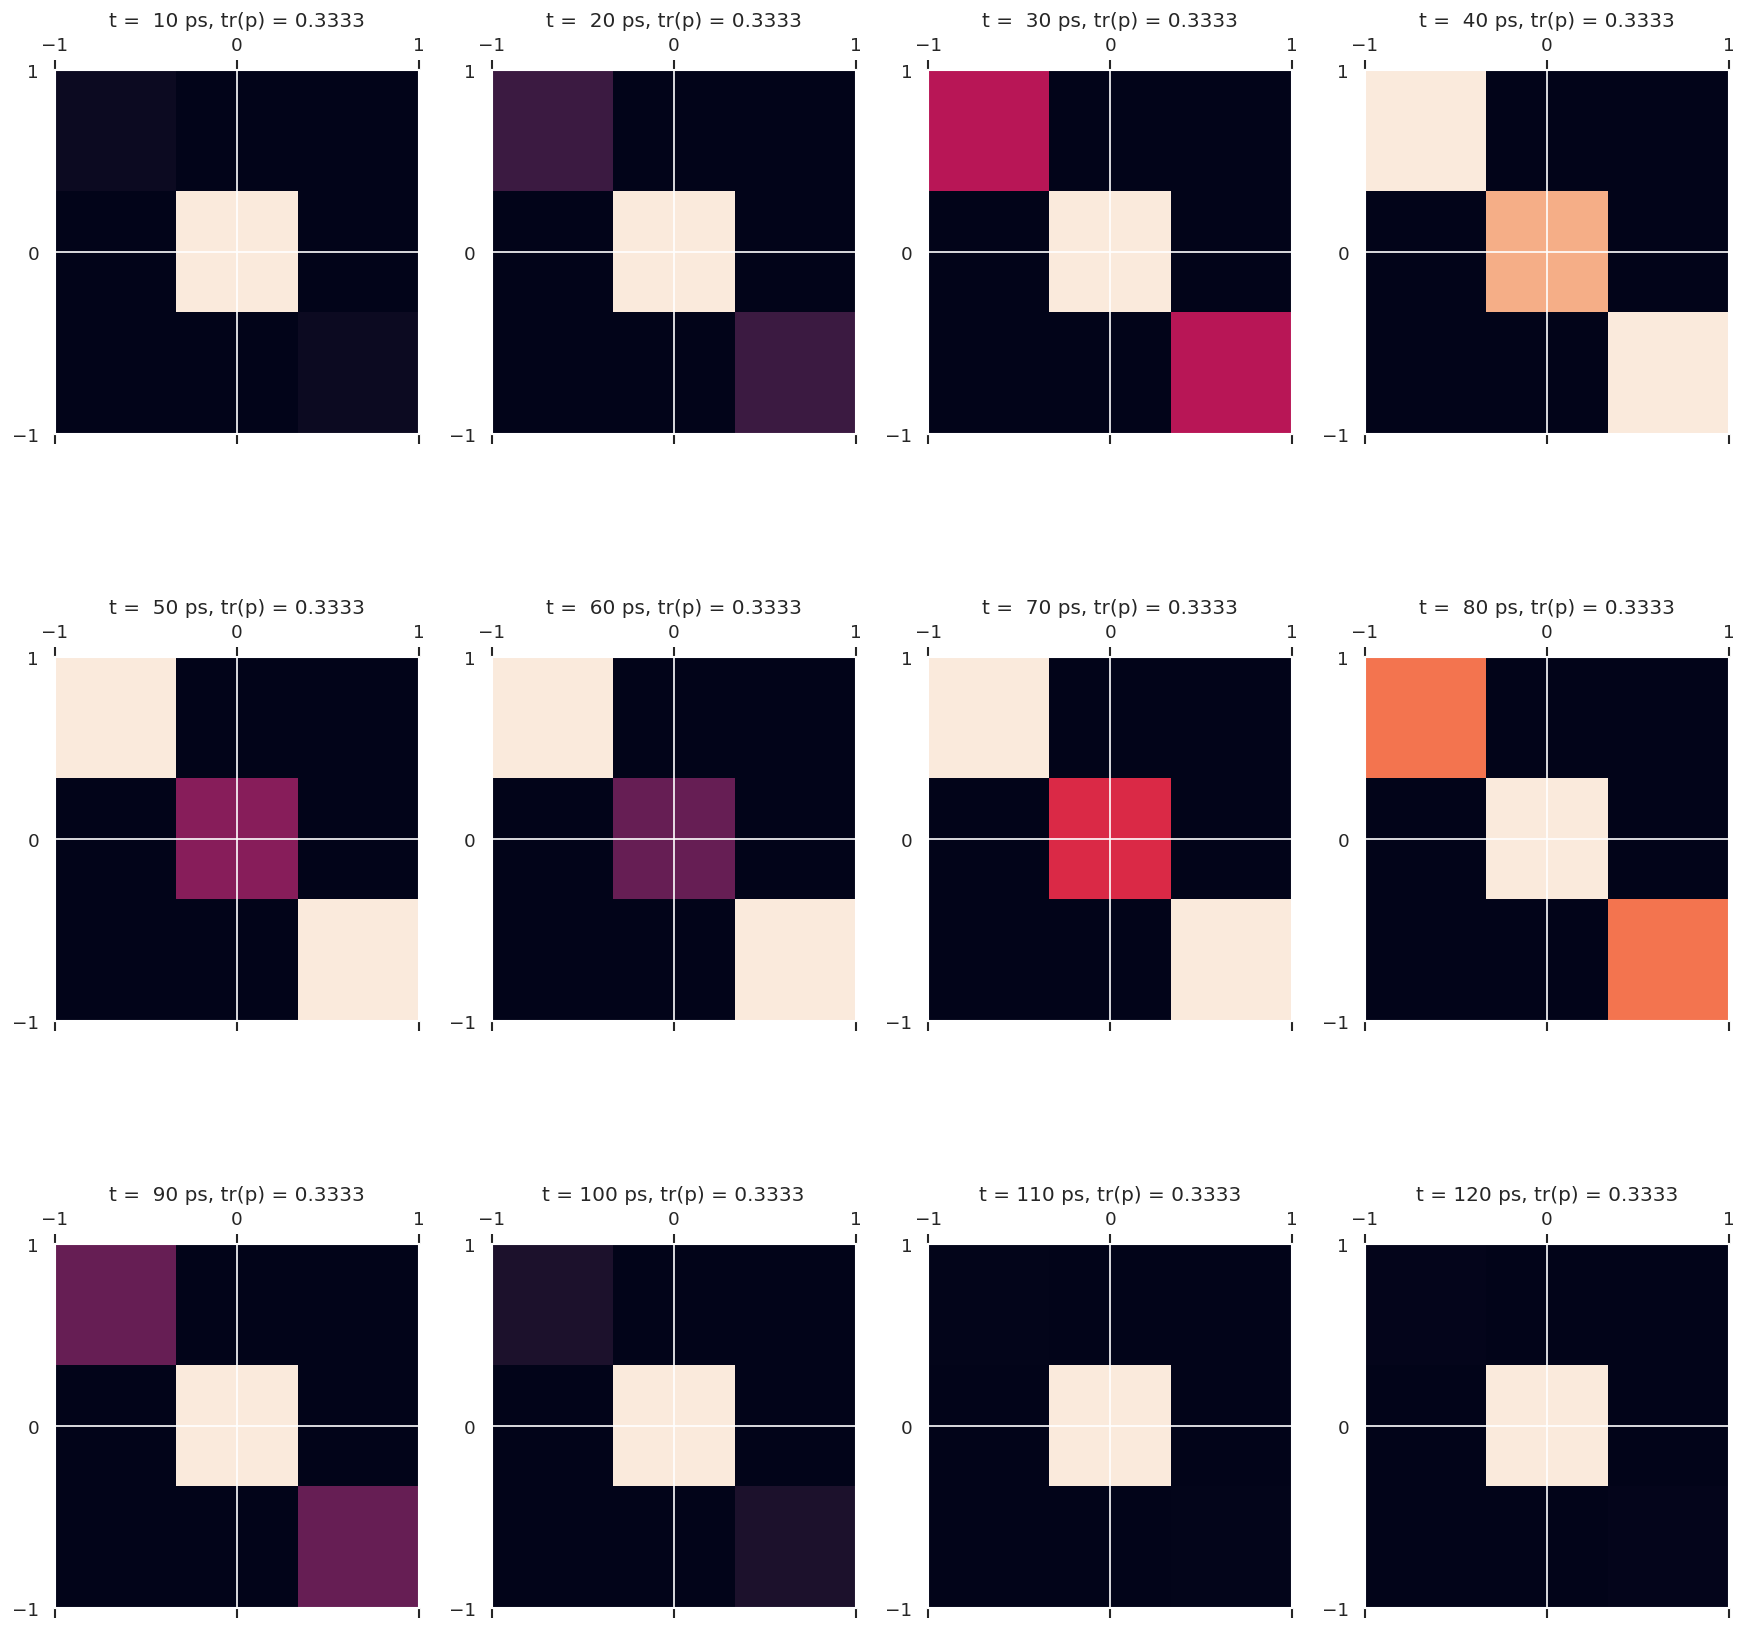

In [124]:
# Plot pmm(t) using modified version of old code...

tStart = 8
tEnd = 20
# tEnd = round(tIn.shape[0]/4)
tStep = 1

# Set up subplots. For polar use, see example at https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html
sPlots = [3,4]
fig, axes = plt.subplots(sPlots[0], sPlots[1], figsize=(18, 18)) 
n = m = 0

# Set final state parameters by isotope
# JFlist = JF131
# Jf = np.int(JFlist[0][0]) # Final state J
isoKey = '129Xe'
JFlist = calcDict['modelDict'][isoKey].attrs['states']['JFlist']
# Jf = np.int(JFlist[0][0]) # Final state J
Jf = calcDict['modelDict'][isoKey].attrs['states']['Jf']
Ji = calcDict['modelDict'][isoKey].attrs['states']['Ji']

tIn = calcDict['modelDict'][isoKey].t.data

print('p(Jf;t) for (Ji,Jf) = ({0},{1})'.format(Ji,Jf))

for tPlot in range(tStart,tEnd,tStep):
    # Calculate
    # TKQin = np.vstack((TKQ[:,0:2].T,TJt[:,tPlot])).T
    # pmm = pJpNpJN(Jf,Jf,TKQin)  # Determine pmm
    
    # print(f"tPlot={tPlot}, t={tIn[tPlot]}")
    # Set data
    TKQin = calcDict['modelDict'][isoKey][tPlot]
    pmm = pJpNpJNXR(Jf,Jf,TKQin)  # Determine pmm
    
    # Singe polar plot
    # plt.polar(np.concatenate((tList, tList+pi)),np.concatenate((Ytp, Ytp)),fig=fig, ax=axes[n, m])  # Manual fix to symmetry for theta = 0:2pi
    
    # Polar subplot, with bounds checking
    if (m+1)*(n+1)>(sPlots[0]*sPlots[1]):
        pass
    elif (n+1)>sPlots[0]:
        pass
    else:
        axes[n,m].matshow(pmm/np.trace(pmm), extent = (-Jf,Jf,-Jf,Jf), aspect = 'equal') 
        # axes[n,m].set_title('t = {:3.0f} ps, tr(p) = {:1.4f}'.format(tIn[tPlot]/1e-12,np.trace(pmm)))
        axes[n,m].set_title('t = {:3.0f} ps, tr(p) = {:1.4f}'.format(tIn[tPlot],np.trace(pmm)))
    
    # Subplot indexing
    m += 1
    if m >= sPlots[1]:
        m = 0
        n += 1
        
plt.show()

p(Jf;t) for (Ji,Jf) = (0,1)


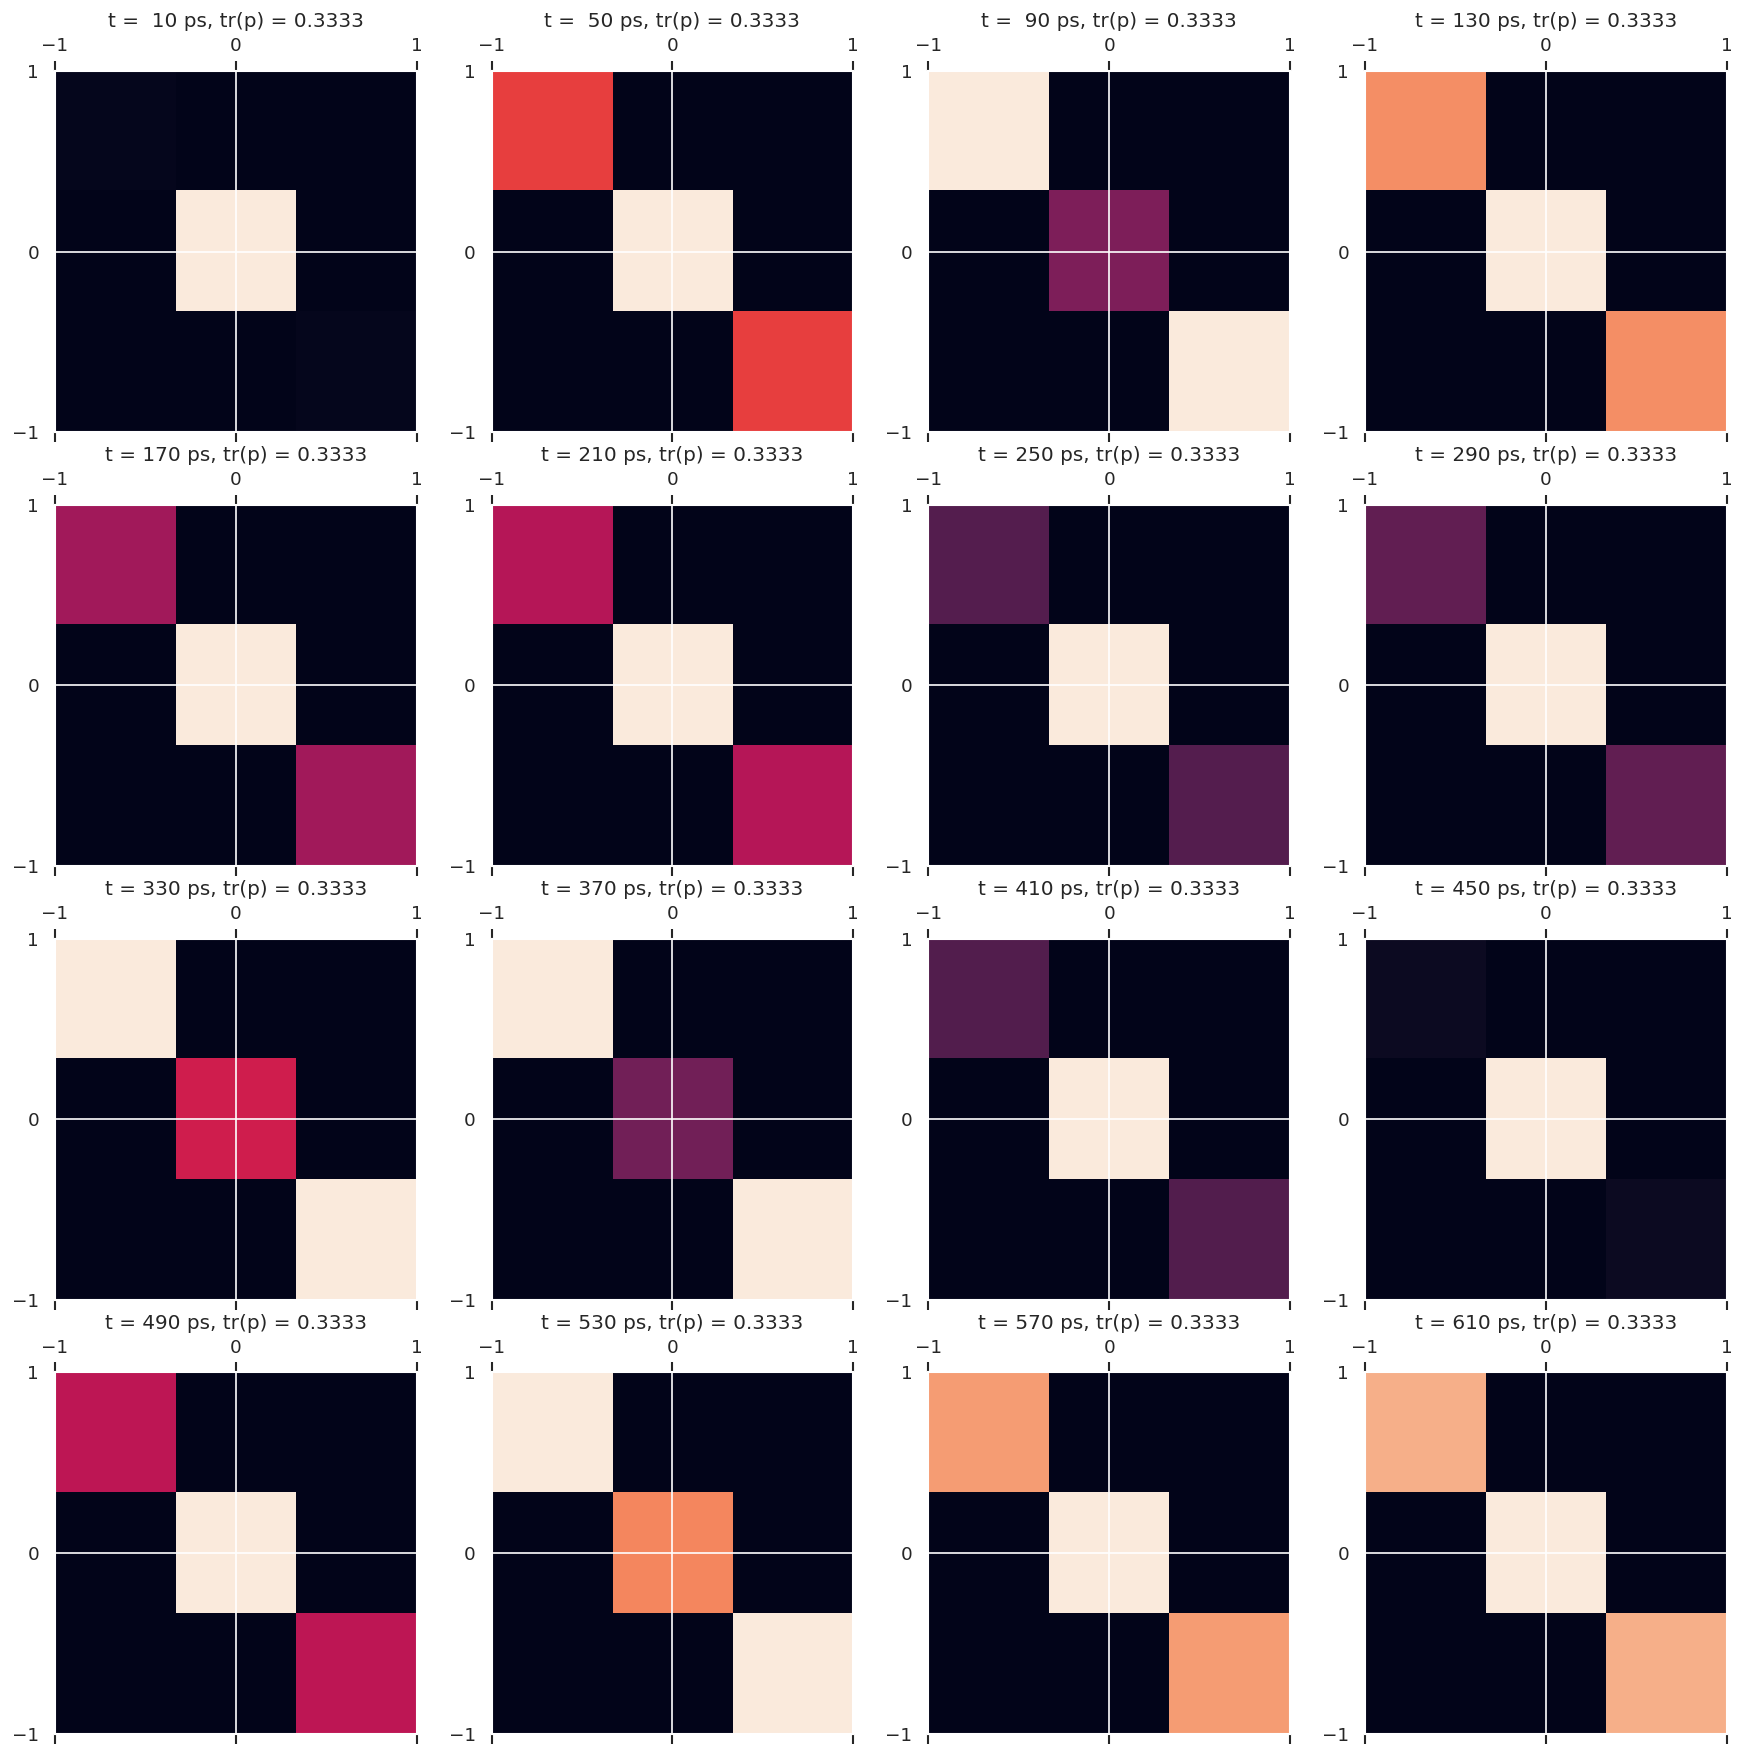

In [125]:
# Plot pmm(t) using modified version of old code...

tStart = 8
tEnd = 90
# tEnd = round(tIn.shape[0]/4)
tStep = 4

# Set up subplots. For polar use, see example at https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html
sPlots = [4,4]
fig, axes = plt.subplots(sPlots[0], sPlots[1], figsize=(18, 18)) 
n = m = 0

# Set final state parameters by isotope
# JFlist = JF131
# Jf = np.int(JFlist[0][0]) # Final state J
isoKey = '131Xe'
JFlist = calcDict['modelDict'][isoKey].attrs['states']['JFlist']
# Jf = np.int(JFlist[0][0]) # Final state J
Jf = calcDict['modelDict'][isoKey].attrs['states']['Jf']
Ji = calcDict['modelDict'][isoKey].attrs['states']['Ji']

tIn = calcDict['modelDict'][isoKey].t.data

print('p(Jf;t) for (Ji,Jf) = ({0},{1})'.format(Ji,Jf))

for tPlot in range(tStart,tEnd,tStep):
    # Calculate
    # TKQin = np.vstack((TKQ[:,0:2].T,TJt[:,tPlot])).T
    # pmm = pJpNpJN(Jf,Jf,TKQin)  # Determine pmm
    
    # print(f"tPlot={tPlot}, t={tIn[tPlot]}, [n,m]={n,m}")
    
    # Set data
    TKQin = calcDict['modelDict'][isoKey][tPlot]
    pmm = pJpNpJNXR(Jf,Jf,TKQin)  # Determine pmm
    
    # Singe polar plot
    # plt.polar(np.concatenate((tList, tList+pi)),np.concatenate((Ytp, Ytp)),fig=fig, ax=axes[n, m])  # Manual fix to symmetry for theta = 0:2pi
    
    # Polar subplot, with bounds checking
    # if (m+1)+((n-1)*sPlots[0])>(sPlots[0]*sPlots[1]):
    if (m+1)*(n+1)>(sPlots[0]*sPlots[1]):
        pass
    elif (n+1)>sPlots[0]:
        pass
    else:
        axes[n,m].matshow(pmm/np.trace(pmm), extent = (-Jf,Jf,-Jf,Jf), aspect = 'equal') 
        # axes[m,n].matshow(pmm/np.trace(pmm), extent = (-Jf,Jf,-Jf,Jf), aspect = 'equal') 
        # axes[n,m].set_title('t = {:3.0f} ps, tr(p) = {:1.4f}'.format(tIn[tPlot]/1e-12,np.trace(pmm)))
        axes[n,m].set_title('t = {:3.0f} ps, tr(p) = {:1.4f}'.format(tIn[tPlot],np.trace(pmm)))
        # axes[m,n].set_title('t = {:3.0f} ps, tr(p) = {:1.4f}'.format(tIn[tPlot],np.trace(pmm)))
    
    # Subplot indexing
    m += 1
    if m >= sPlots[1]:
        m = 0
        n += 1
        
plt.show()

## Electronic state distribution/alignment

In [130]:
# Function to sum Ylm from a list, with optional normalisation.
# Include additional 3j term to implement eqn. 101, for real-space W(theta,phi) representation.
def sphSumTKQXR(AXR, J, norm = 1.0):
    Atp = 0
    thres = 1E-5
    
    # Set data for legacy code
    AKQ = AXR.TKQ
    A = AXR.data
    
    if unFlag:
        A = unumpy.nominal_values(A)
    
    # Loop over rows in input & add YKQ terms (should be able to convert to list comprehension for brevity)
    for row in range(AKQ.shape[0]):  
        if np.absolute(A[row]) > thres:
            K = AKQ[row].data.item()[0]
            Q = AKQ[row].data.item()[1]
            angMomTerm = (-1)**J * (2*J+1) * wigner_3j(J,J,K,0,0,0)
            Atp += angMomTerm*Ynm(np.int(K),np.int(Q),theta,phi) * A[row]/norm # Add TKQ*Y(K,Q) term
            
    return Atp*sqrt(1/(4*pi))



    
#     Jmax = max(J,Jp)
#     Pmm = np.zeros((2*Jmax+1,2*Jmax+1))
    
#     for Mp in range(-Jp,Jp+1):
#         for M in range(-J,J+1):
#             for row in range(KQ.shape[0]):
#                 K = KQ[row].data.item()[0]
#                 Q = KQ[row].data.item()[1]
#                 Pmm[Mp+Jp][M+J] += (-1)**(Jp-Mp)*sqrt(2*K+1)*wigner_3j(Jp,J,K,Mp,-M,-Q)*TKQ[row]

In [129]:
calcDict['modelDict'][isoKey][tPlot][0]

<xarray.DataArray '131Xe' ()>
array(0.1924500897298752+/-0, dtype=object)
Coordinates:
    t        float64 -70.0
    TKQ      object (0, 0)
Attributes:
    dataType:       TKQ
    long_name:      Irreducible tensor parameters
    units:          arb
    harmonics:      {'dtype': 'Complex harmonics', 'kind': 'complex', 'normTy...
    abundance:      0.212324+/-0.000030
    states:         {'JFlist': array([[1, 1.5, 1.5, 1.6903351783110374e-24+/-...
    uncertainties:  True


 At various t...


/tmp/ipykernel_104067/3300663484.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Atp += angMomTerm*Ynm(np.int(K),np.int(Q),theta,phi) * A[row]/norm # Add TKQ*Y(K,Q) term


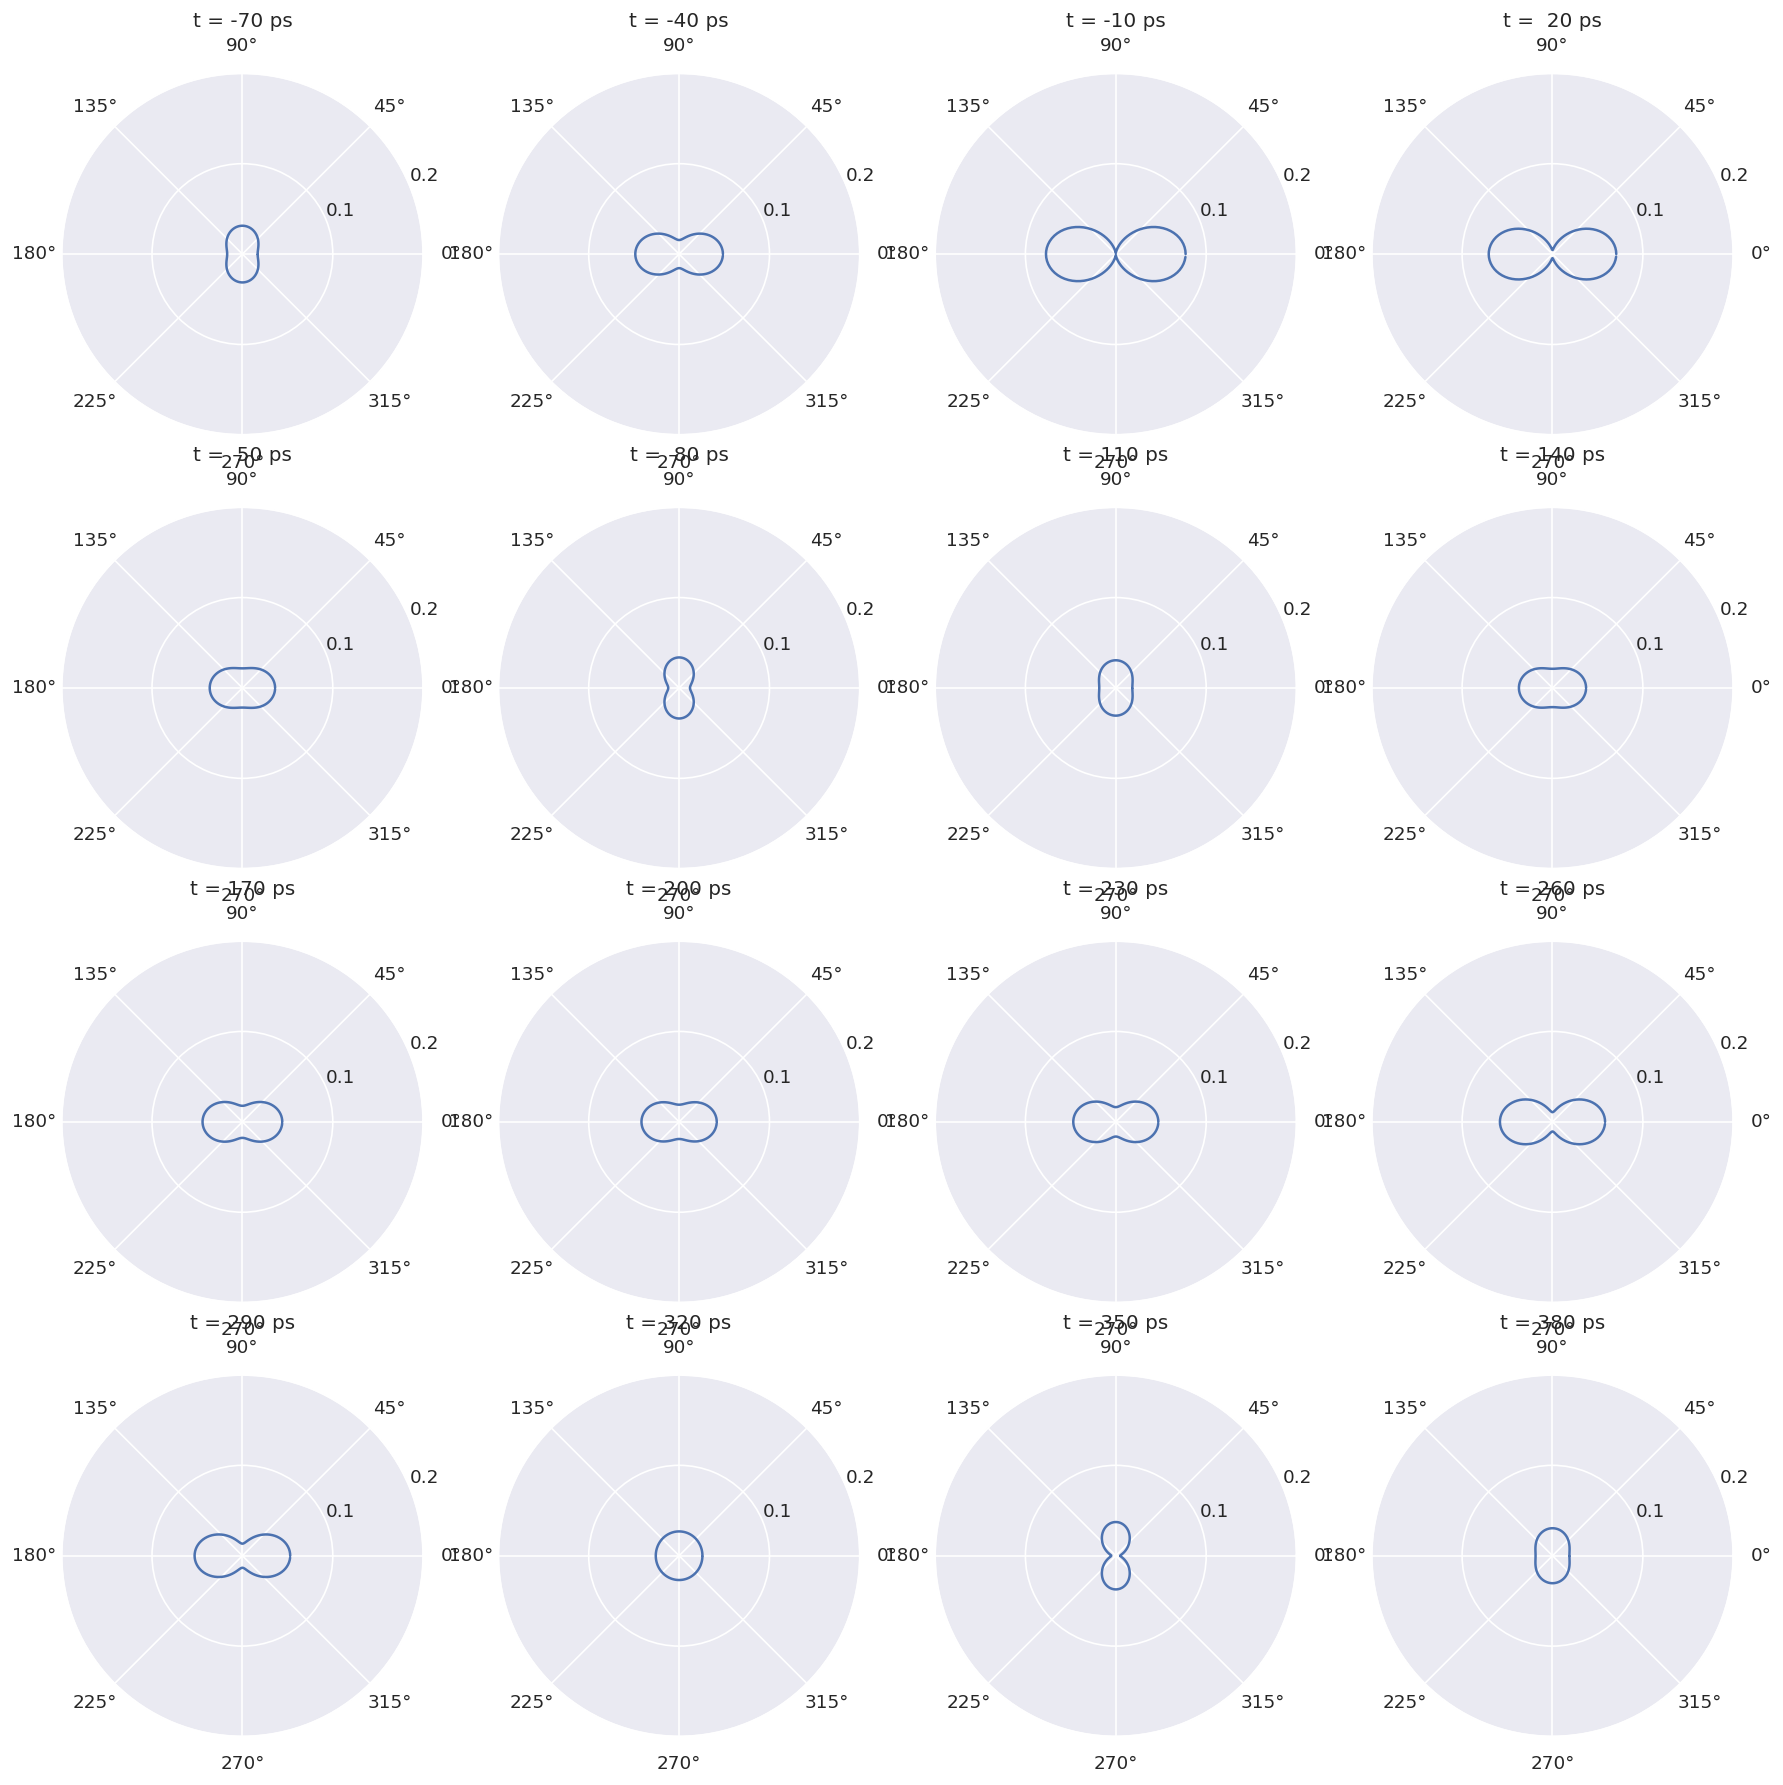

In [134]:
# Define temporal points to plot as index into tIn
tStart = 0
tEnd = 50
# tEnd = round(tIn.shape[0]/4)
tStep = 3

# Define theta values for plot
tList = np.arange(0,pi,0.05)

# print('T(J;t) for (Ji,Jf) = ({0},{1}), p = {2}'.format(Ji,Jf,p))
# print('\n At 1-photon abs.')
# print(TKQ)

# Set final state parameters by isotope
# JFlist = JF131
# Jf = np.int(JFlist[0][0]) # Final state J
isoKey = '131Xe'
JFlist = calcDict['modelDict'][isoKey].attrs['states']['JFlist']
# Jf = np.int(JFlist[0][0]) # Final state J
Jf = calcDict['modelDict'][isoKey].attrs['states']['Jf']
Ji = calcDict['modelDict'][isoKey].attrs['states']['Ji']

tIn = calcDict['modelDict'][isoKey].t.data

print('\n At various t...')

# Set up subplots. For polar use, see example at https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html
sPlots = [4,4]
fig, axes = plt.subplots(sPlots[0], sPlots[1], figsize=(18, 18), subplot_kw=dict(projection='polar')) 
n = m = 0

for tPlot in range(tStart,tEnd,tStep):
    
    # Set data
    TKQin = calcDict['modelDict'][isoKey][tPlot]
    # pmm = pJpNpJNXR(Jf,Jf,TKQin)  # Determine pmm
    
    # Calculate
    # TKQin = np.vstack((TKQ[:,0:2].T,TJt[:,tPlot])).T
    Atp = sphSumTKQXR(TKQin, Jf,)  # norm = TKQin)
    Ytp = sphNList(Atp,tList)
    
    # Singe polar plot
    # plt.polar(np.concatenate((tList, tList+pi)),np.concatenate((Ytp, Ytp)),fig=fig, ax=axes[n, m])  # Manual fix to symmetry for theta = 0:2pi
    
    # Polar subplot, with bounds checking
    if (m+1)+(n*sPlots[0])>(sPlots[0]*sPlots[1]):
        pass
    else:
        axes[n,m].plot(np.concatenate((tList, tList+pi)),np.concatenate((Ytp, Ytp)))
        axes[n,m].set_title('t = {:3.0f} ps'.format(tIn[tPlot]))
        axes[n,m].set_rticks([0.1, 0.2])  # Reduce radial ticks
    
    # Subplot indexing
    m += 1
    if m >= sPlots[1]:
        m = 0
        n += 1
        
plt.show()

## Versions

In [ ]:
import scooby
scooby.Report(additional=['qbanalysis','pemtk','epsproc', 'holoviews', 'hvplot', 'xarray', 'matplotlib', 'bokeh'])

In [ ]:
# # Check current Git commit for local ePSproc version
# from pathlib import Path
# !git -C {Path(qbanalysis.__file__).parent} branch
# !git -C {Path(qbanalysis.__file__).parent} log --format="%H" -n 1

In [ ]:
# # Check current remote commits
# !git ls-remote --heads https://github.com/phockett/qbanalysis

In [ ]:
# Check current Git commit for local code version
import qbanalysis
!git -C {Path(qbanalysis.__file__).parent} branch
!git -C {Path(qbanalysis.__file__).parent} log --format="%H" -n 1

In [ ]:
# Check current remote commits
!git ls-remote --heads https://github.com/phockett/Quantum-Beat_Photoelectron-Imaging_Spectroscopy_of_Xe_in_the_VUV